In [1]:
import pandas as pd
import numpy as np
print("Battle of Neighbourhood!")

Battle of Neighbourhood!


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Data acquisition and cleaning

1) Canada Neighbourhood details is downloaded from the Wikipedia and import cordinates of the neighbourhood  using GEOPY

In [15]:
import requests
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = requests.get(url).content
df_list = pd.read_html(html)
df_CAN = df_list[0]
df_CAN['Neighbourhood'].loc[df_CAN['Neighbourhood'] == 'Not assigned'] =  df_CAN.Borough # Cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
df_CAN=df_CAN[df_CAN['Borough']!='Not assigned'] #Ignoring cells with a borough that is Not assigned
df_CAN.head()
df_CAN2=pd.DataFrame(columns=df_CAN.columns)
df_CAN['Neighbourhood1']=df_CAN['Neighbourhood'].apply(lambda x: x.split(',')) # Spliting the Borough in different rows for multple are is there

for a,b,c in zip(df_CAN['Postal Code'],df_CAN['Borough'],df_CAN['Neighbourhood1']):
    j=len(c)
    if j==1:
        df_CAN2 =df_CAN2.append({'Postal Code':a,'Borough':b,'Neighbourhood':c[0]} , ignore_index=True)
    else:
        for k in range (0,j):
            df_CAN2 =df_CAN2.append({'Postal Code':a,'Borough':b,'Neighbourhood':c[k]}, ignore_index=True)
                  
df_CAN2['adress']=df_CAN2['Borough']+[", "]+df_CAN2['Neighbourhood']
df_CAN2

# Importing the Cordinatinates with Geopy
df_CAN=pd.DataFrame(columns=df_CAN2.columns)
df_CAN['latitude']=""
df_CAN['longitude']=""

for a, b, c, d in zip(df_CAN2['Postal Code'],df_CAN2['Borough'],df_CAN2['Neighbourhood'],df_CAN2['adress']):
    address=d
     
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude=""
        longitude=""
        
       
    df_CAN =df_CAN.append({'Postal Code':a,'Borough':b,'Neighbourhood':c,'latitude': latitude,
                                          'longitude':longitude,'adress':d}, ignore_index=True)
df_CAN=df_CAN[df_CAN['latitude']!=""] #removing the Area where there is no Cordinates
df_CAN['City']='Toronto, Cannada'
df_CAN.head()



C:\Users\denny.thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [45]:
df_CAN['City']='Toronto, Cannada'
df_CAN.head()

,Postal Code,Borough,Neighbourhood,adress,latitude,longitude,City
0,M3A,North York,Parkwoods,"North York, Parkwoods",43.7611,-79.3241,"Toronto, Cannada"
1,M4A,North York,Victoria Village,"North York, Victoria Village",43.7327,-79.3112,"Toronto, Cannada"
4,M6A,North York,Lawrence Manor,"North York, Lawrence Manor",43.7221,-79.4375,"Toronto, Cannada"
5,M6A,North York,Lawrence Heights,"North York, Lawrence Heights",43.7228,-79.4509,"Toronto, Cannada"
6,M7A,Downtown Toronto,Queen's Park,"Downtown Toronto, Queen's Park",43.6632,-79.3863,"Toronto, Cannada"


Importing the Newyork Neighbourhoods

In [18]:
import wget
url= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json'
myfile = wget.download(url)
print('Data downloaded!')
myfile

Data downloaded!


'newyork_data (1).json'

In [22]:
with open('newyork_data (1).json') as json_data:
    newyork_data = json.load(json_data)
newyork_data
neighborhoods_data = newyork_data['features']
# define the dataframe columns
column_names = ['Borough', 'Neighbourhood', 'latitude', 'longitude'] 
# instantiate the dataframe
df_new = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough  = data['properties']['borough'] 
  
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    latitude = neighborhood_latlon[1]
    longitude = neighborhood_latlon[0]
    
    df_new = df_new.append({'Borough': borough,
                                          'Neighbourhood': neighborhood_name,
                                          'latitude': latitude,
                                          'longitude': longitude}, ignore_index=True)
    df_new


In [43]:
df_new['City']='New York City, NY'
df_new

,Borough,Neighbourhood,latitude,longitude,City
0,Bronx,Wakefield,40.894705,-73.847201,"New York City, NY"
1,Bronx,Co-op City,40.874294,-73.829939,"New York City, NY"
2,Bronx,Eastchester,40.887556,-73.827806,"New York City, NY"
3,Bronx,Fieldston,40.895437,-73.905643,"New York City, NY"
4,Bronx,Riverdale,40.890834,-73.912585,"New York City, NY"
5,Bronx,Kingsbridge,40.881687,-73.902818,"New York City, NY"
6,Manhattan,Marble Hill,40.876551,-73.910660,"New York City, NY"
7,Bronx,Woodlawn,40.898273,-73.867315,"New York City, NY"
8,Bronx,Norwood,40.877224,-73.879391,"New York City, NY"
9,Bronx,Williamsbridge,40.881039,-73.857446,"New York City, NY"


Combining the Canada dataframe and Newyork Dataframe into a single Dataframe

In [46]:
df=df_CAN.append(df_new)

In [47]:
df

,Postal Code,Borough,Neighbourhood,adress,latitude,longitude,City
0,M3A,North York,Parkwoods,"North York, Parkwoods",43.7611,-79.3241,"Toronto, Cannada"
1,M4A,North York,Victoria Village,"North York, Victoria Village",43.7327,-79.3112,"Toronto, Cannada"
4,M6A,North York,Lawrence Manor,"North York, Lawrence Manor",43.7221,-79.4375,"Toronto, Cannada"
5,M6A,North York,Lawrence Heights,"North York, Lawrence Heights",43.7228,-79.4509,"Toronto, Cannada"
6,M7A,Downtown Toronto,Queen's Park,"Downtown Toronto, Queen's Park",43.6632,-79.3863,"Toronto, Cannada"
8,M9A,Etobicoke,Islington Avenue,"Etobicoke, Islington Avenue",43.6708,-79.5349,"Toronto, Cannada"
9,M9A,Etobicoke,Humber Valley Village,"Etobicoke, Humber Valley Village",43.6665,-79.5243,"Toronto, Cannada"
10,M1B,Scarborough,Malvern,"Scarborough, Malvern",43.8092,-79.2217,"Toronto, Cannada"
11,M1B,Scarborough,Rouge,"Scarborough, Rouge",43.8049,-79.1658,"Toronto, Cannada"
12,M3B,North York,Don Mills,"North York, Don Mills",43.7753,-79.3459,"Toronto, Cannada"


FourSquare Credentials

In [69]:
CLIENT_ID = 'XXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XXXX
CLIENT_SECRET:XXXX


Creating the function for getting the venues from the foursquare

In [55]:
def getNearbyVenues(Borough,City,names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for bor,cit,name, lat, lng in zip(Borough,City,names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            bor,
            cit,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','City','Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Extracting the Venues

In [58]:
df_venues = getNearbyVenues(Borough=df['Borough'],City=df['City'],names=df['Neighbourhood'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor
 Lawrence Heights
Queen's Park
Islington Avenue
 Humber Valley Village
Malvern
 Rouge
Don Mills
Parkview Hill
 Woodbine Gardens
Garden District
 Ryerson
Glencairn
West Deane Park
 Princess Gardens
 Martin Grove
 Islington
 Cloverdale
Rouge Hill
 Port Union
 Highland Creek
Don Mills
Woodbine Heights
Humewood-Cedarvale
Eringate
 Bloordale Gardens
 Old Burnhamthorpe
 Markland Wood
Guildwood
 Morningside
 West Hill
The Beaches
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
 Wilson Heights
 Downsview North
Thorncliffe Park
Richmond
 Adelaide
 King
Dufferin
 Dovercourt Village
Scarborough Village
Fairview
 Henry Farm
 Oriole
Northwood Park
 York University
East Toronto
 Union Station
Little Portugal
 Trinity
Kennedy Park
 Ionview
 East Birchmount Park
Bayview Village
Downsview
The Danforth West
 Riverdale
 Design Exchange
Brockton
 Parkdale Village
 Exhibition Place
Golden Mile
 Clairlea
 Oakridge
York Mills
 Silver Hills
Down

In [70]:
df_venues.shape

(14549, 10)

In [60]:
df_venues.head()

,Borough,City,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Tim Hortons,43.760668,-79.326368,Café
2,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,A&W,43.760643,-79.326865,Fast Food Restaurant
3,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
4,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Food Basics,43.760549,-79.326045,Supermarket


Exporting the extracted venue for the future use

In [63]:
df_venues.to_csv(("C:\\Users\\denny.thomas\\Downloads\\venues.csv"))

In [3]:
df_venues=pd.read_csv("C:\\Users\\denny.thomas\\Downloads\\venues.csv")
df_venues.head()

,Unnamed: 0,Borough,City,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,1,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Tim Hortons,43.760668,-79.326368,Café
2,2,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,A&W,43.760643,-79.326865,Fast Food Restaurant
3,3,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Shoppers Drug Mart,43.760857,-79.324961,Pharmacy
4,4,North York,"Toronto, Cannada",Parkwoods,43.761124,-79.324059,Food Basics,43.760549,-79.326045,Supermarket


In [4]:
print('{} venues were returned by Foursquare.'.format(df_venues.shape[0]))

14549 venues were returned by Foursquare.


In [12]:
df_venues.groupby(['Neighbourhood'])['Neighbourhood'].count()

Neighbourhood
 Adelaide                    100
 Agincourt North              27
 Albion Gardens                4
 Bathurst Quay                70
 Bloordale Gardens             7
 Cabbagetown                  39
 Chinatown                    77
 Clairlea                      8
 Cliffcrest                    6
 Cliffside West                5
 Cloverdale                   24
 Deer Park                    60
 Design Exchange             100
 Dovercourt Village            8
 Downsview North              10
 East Birchmount Park          6
 Emery                         8
 Exhibition Place             36
 Forest Hill Road Park         6
 Forest Hill SE                3
 Harbord                      53
 Henry Farm                    4
 Highland Creek                3
 Humber Bay                    4
 Humber Valley Village         5
 Humbergate                    2
 Ionview                       3
 Islington                    24
 Jamestown                     9
 King                        

In [60]:
df_venues.groupby(['Venue Category'])['Venue Category'].count()

Venue Category
ATM                                           1
Accessories Store                            17
Adult Boutique                                1
Afghan Restaurant                             5
African Restaurant                            8
Airport Terminal                              1
American Restaurant                         196
Animal Shelter                                1
Antique Shop                                  9
Aquarium                                      2
Arcade                                        2
Arepa Restaurant                              9
Argentinian Restaurant                       10
Art Gallery                                  59
Art Museum                                    9
Arts & Crafts Store                          30
Arts & Entertainment                          2
Asian Restaurant                             72
Athletics & Sports                           25
Auditorium                                    1
Australian Restaurant    

In [4]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

C:\Users\denny.thomas\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Converting the Venue categories in to the Numerical for the exploratory Data analysis

In [7]:
Venues = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

In [8]:
Venues.shape

(14549, 463)

In [5]:
df_venues.columns

Index(['Unnamed: 0', 'Borough', 'City', 'Neighbourhood',
       'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [9]:
Venues[['Borough','City','Neighbourhood',
       'Neighbourhood Latitude','Neighbourhood Longitude']]=df_venues[['Borough','City','Neighbourhood',
       'Neighbourhood Latitude','Neighbourhood Longitude']]

In [10]:
Venues_Gr = Venues.groupby(['Borough','City','Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude']).mean().reset_index()

In [11]:
Venues_Gr.shape

(485, 468)

Ferature Set Selection

In [13]:
f=Venues_Gr.columns[5:,]

In [14]:
featureset=Venues_Gr[f]

In [15]:
feature_mtx=featureset.values


In [16]:
feature_mtx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.25927249 0.22635054 ... 0.50552503 0.32887645 0.31744123]
 [0.25927249 0.         0.26305424 ... 0.48476799 0.33119103 0.32269947]
 [0.22635054 0.26305424 0.         ... 0.49752474 0.34176263 0.29249735]
 ...
 [0.50552503 0.48476799 0.49752474 ... 0.         0.53473124 0.4991342 ]
 [0.32887645 0.33119103 0.34176263 ... 0.53473124 0.         0.27878219]
 [0.31744123 0.32269947 0.29249735 ... 0.4991342  0.27878219 0.        ]]


In [18]:
DIST_Matrix=pd.DataFrame(dist_matrix,columns=Venues_Gr['Neighbourhood'].values)

In [19]:
DIST_Matrix.head()

,Allerton,Baychester,Bedford Park,Belmont,Bronxdale,Castle Hill,City Island,Claremont Village,Clason Point,Co-op City,Concourse,Concourse Village,Country Club,East Tremont,Eastchester,Edenwald,Edgewater Park,Fieldston,Fordham,High Bridge,Hunts Point,Kingsbridge,Kingsbridge Heights,Longwood,Melrose,Morris Heights,Morris Park,Morrisania,Mott Haven,Mount Eden,Mount Hope,North Riverdale,Norwood,Olinville,Parkchester,Pelham Bay,Pelham Gardens,Pelham Parkway,Port Morris,Riverdale,Schuylerville,Soundview,Spuyten Duyvil,Throgs Neck,Unionport,University Heights,Van Nest,Wakefield,West Farms,Westchester Square,Williamsbridge,Woodlawn,Bath Beach,Bay Ridge,Bedford Stuyvesant,Bensonhurst,Bergen Beach,Boerum Hill,Borough Park,Brighton Beach,Broadway Junction,Brooklyn Heights,Brownsville,Bushwick,Canarsie,Carroll Gardens,City Line,Clinton Hill,Cobble Hill,Coney Island,Crown Heights,Cypress Hills,Ditmas Park,Downtown,Dumbo,Dyker Heights,East Flatbush,East New York,East Williamsburg,Erasmus,Flatbush,Flatlands,Fort Greene,Fort Hamilton,Fulton Ferry,Georgetown,Gerritsen Beach,Gowanus,Gravesend,Greenpoint,Highland Park,Homecrest,Kensington,Madison,Manhattan Beach,Manhattan Terrace,Marine Park,Midwood,Mill Basin,Mill Island,New Lots,North Side,Ocean Hill,Ocean Parkway,Paerdegat Basin,Park Slope,Prospect Heights,Prospect Lefferts Gardens,Prospect Park South,Red Hook,Remsen Village,Rugby,Sea Gate,Sheepshead Bay,South Side,Starrett City,Sunset Park,Vinegar Hill,Weeksville,Williamsburg,Windsor Terrace,Wingate,Deer Park,Forest Hill Road Park,Forest Hill SE,Lawrence Park,North Midtown,Rathnelly,South Hill,Summerhill East,Yorkville,Davisville,Davisville North,Forest Hill North & West,Lawrence Park,Moore Park,North Toronto West,Roselawn,Summerhill West,The Annex,Adelaide,Bathurst Quay,Cabbagetown,Chinatown,Design Exchange,Harbord,King,King and Spadina,Ryerson,South Niagara,Union Station,Victoria Hotel,Central Bay Street,Christie,Church and Wellesley,Garden District,Kensington Market,Queen's Park,Richmond,Rosedale,University of Toronto,Riverdale,The Beaches West,The Beaches,The Danforth West,Woodbine Gardens,East Toronto,Leaside,Parkview Hill,Thorncliffe Park,Woodbine Heights,Albion Gardens,Bloordale Gardens,Cloverdale,Humber Bay,Humber Valley Village,Humbergate,Islington,Jamestown,King's Mill Park,Kingsway Park South East,Kingsway Park South West,Long Branch,Markland Wood,Martin Grove,Martin Grove Gardens,Mimico NE,Mimico South,Montgomery Road,Mount Olive,Old Burnhamthorpe,Old Mill North,Princess Gardens,Richview Gardens,Royal York South East,Royal York South West,Silverstone,South of Bloor,St. Phillips,Sunnylea,The Queensway East,The Queensway West,Thistletown,West Humber - Clairville,Alderwood,Eringate,Islington Avenue,Kingsview Village,Mimico NW,New Toronto,Northwest,Old Mill South,South Steeles,The Kingsway,West Deane Park,Westmount,Battery Park City,Carnegie Hill,Central Harlem,Chelsea,Chinatown,Civic Center,Clinton,East Harlem,East Village,Financial District,Flatiron,Gramercy,Greenwich Village,Hamilton Heights,Hudson Yards,Inwood,Lenox Hill,Lincoln Square,Little Italy,Lower East Side,Manhattan Valley,Manhattanville,Marble Hill,Midtown,Midtown South,Morningside Heights,Murray Hill,Noho,Roosevelt Island,Soho,Stuyvesant Town,Sutton Place,Tribeca,Tudor City,Turtle Bay,Upper East Side,Upper West Side,Washington Heights,West Village,Yorkville,Downsview North,Emery,Henry Farm,Lawrence Heights,Maple Leaf Park,Newtonbrook,Oriole,Silver Hills,Upwood Park,Willowdale East,Willowdale West,Wilson Heights,York University,Bayview Village,Bedford Park,Don Mills,Downsview,Fairview,Glencairn,Hillcrest Village,Humber Summit,Humberlea,Lawrence Manor,North Park,Northwood Park,Parkwoods,Victoria Village,Willowdale,York Mills,York Mills West,Arverne,Astoria,Astoria Heights,Auburndale,Bay Terrace,Bayside,Bayswater,Beechhurst,Bellaire,Belle Harbor,Bellerose,Blissville,Breezy Point,Briarwood,Broad Channel,Brookville,Cambria Heights,College Point,Corona,Douglaston,East Elmhurs

In [20]:
DIST_Matrix[['Borough','City','Neighbourhood',
       'Neighbourhood Latitude','Neighbourhood Longitude']]=Venues_Gr[['Borough','City','Neighbourhood',
       'Neighbourhood Latitude','Neighbourhood Longitude']]

In [21]:
x=Venues_Gr['Neighbourhood'].values

In [22]:
DIST_Matrix.shape

(485, 490)

In [85]:
DIST_Matrix.to_csv(("C:\\Users\\denny.thomas\\Downloads\\DIST_Matrix.csv"))

Defining the function for the getting the most common venues

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[0:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
d = ['Borough','City','Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude']
e = ['Borough','City','Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude']
for ind in np.arange(num_top_venues):
    try:
        e.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        e.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
df_venues_Sorted = pd.DataFrame(columns=e)
df_venues_Sorted[d] = Venues_Gr[d]

for ind in np.arange(Venues_Gr.shape[0]):
    df_venues_Sorted.iloc[ind, 5:] = return_most_common_venues(Venues_Gr.iloc[ind, 5:], num_top_venues)

df_venues_Sorted.head()

,Borough,City,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,"New York City, NY",Allerton,40.865788,-73.859319,Pizza Place,Deli / Bodega,Spa,Supermarket,Chinese Restaurant
1,Bronx,"New York City, NY",Baychester,40.866858,-73.835798,Donut Shop,Fried Chicken Joint,Pizza Place,Shopping Mall,Men's Store
2,Bronx,"New York City, NY",Bedford Park,40.870185,-73.885512,Diner,Pizza Place,Mexican Restaurant,Chinese Restaurant,Deli / Bodega
3,Bronx,"New York City, NY",Belmont,40.857277,-73.888452,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Bank
4,Bronx,"New York City, NY",Bronxdale,40.852723,-73.861726,Italian Restaurant,Pizza Place,Spanish Restaurant,Breakfast Spot,Gym


In [25]:
df_venues_Sorted.head()

,Borough,City,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,"New York City, NY",Allerton,40.865788,-73.859319,Pizza Place,Deli / Bodega,Spa,Supermarket,Chinese Restaurant
1,Bronx,"New York City, NY",Baychester,40.866858,-73.835798,Donut Shop,Fried Chicken Joint,Pizza Place,Shopping Mall,Men's Store
2,Bronx,"New York City, NY",Bedford Park,40.870185,-73.885512,Diner,Pizza Place,Mexican Restaurant,Chinese Restaurant,Deli / Bodega
3,Bronx,"New York City, NY",Belmont,40.857277,-73.888452,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Bank
4,Bronx,"New York City, NY",Bronxdale,40.852723,-73.861726,Italian Restaurant,Pizza Place,Spanish Restaurant,Breakfast Spot,Gym


Determining the values of 'K' for the Kmeans

In [44]:
di_M=pd.DataFrame(columns=['d','k'])
for kclusters in range(1,11):
    try:
        
        Venues_Gr=Venues_Gr.drop('Cluster Labels',1)
    except:
        pass
                           
                           
    Venues_Gr_clustering = Venues_Gr.drop(['Borough','City','Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude'], 1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Venues_Gr_clustering)
    labels = kmeans.predict(Venues_Gr_clustering)  #labels of shape [1000,] with values 0<= i <= 9
    centroids  = kmeans.cluster_centers_  #means of shape [10,]
    cluster_Center=pd.DataFrame(centroids)
    try:
        df_venues_Sorted=df_venues_Sorted.drop('Cluster Labels',1)
        df_venues_Sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    except:
         df_venues_Sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    try:
        Venues_Gr=Venues_Gr.drop('Cluster Labels',1)
        Venues_Gr.insert(0, 'Cluster Labels', kmeans.labels_)
    except:
        Venues_Gr.insert(0, 'Cluster Labels', kmeans.labels_)

    D=pd.DataFrame(columns=['d'])

    for i in Venues_Gr['Cluster Labels'].unique():
            d=pd.DataFrame(columns=['d'])
            Venues_Gr1=Venues_Gr[Venues_Gr['Cluster Labels']==i]
            x=pd.DataFrame(cluster_Center.iloc[i]).transpose()
            y1=Venues_Gr1.columns[6:,]
            y2=Venues_Gr1[y1]


            for j in range(0,y2.shape[0]):
                y=pd.DataFrame((y2.iloc[j]).values).transpose()
                x=x.append(y)
                dist_matrix1 = distance_matrix(x,x)
                d=d.append({'d':dist_matrix1[0,1]}, ignore_index=True)
            D=D.append({'d':d['d'].mean()}, ignore_index=True)

        
    
    di_M=di_M.append({'d':D['d'].mean(),'k':kclusters}, ignore_index=True)
    di_M


    
    
    

In [67]:
di_M

,d,k
0,0.195692,1.0
1,0.223793,2.0
2,0.149382,3.0
3,0.181946,4.0
4,0.176064,5.0
5,0.182766,6.0
6,0.216076,7.0
7,0.213541,8.0
8,0.212531,9.0
9,0.202614,10.0


Ploting the K versus mean_distance

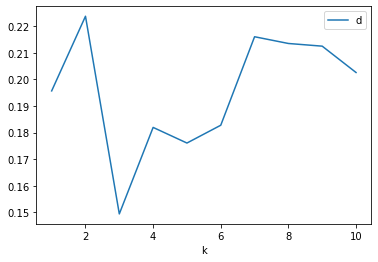

In [48]:
di_M.plot(x='k',y='d',kind='line')

as mean distance is minimum for the K=3 , This used for the clustering

In [26]:
try:
        
    Venues_Gr=Venues_Gr.drop('Cluster Labels',1)
except:
    pass


try:
    df_venues_Sorted=df_venues_Sorted.drop('Cluster Labels',1)
       
except:
    pass
kclusters = 3

Venues_Gr_clustering = Venues_Gr.drop(['Borough','City','Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Venues_Gr_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
centroids  = kmeans.cluster_centers_  #means of shape [10,]


In [27]:
df_venues_Sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Venues_Gr.insert(0, 'Cluster Labels', kmeans.labels_)
cluster_Center=pd.DataFrame(centroids)



In [28]:
df_venues_Sorted.groupby('Cluster Labels').count()

,Borough,City,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,,,,,
0,455,455,455,455,455,455,455,455,455,455
1,27,27,27,27,27,27,27,27,27,27
2,3,3,3,3,3,3,3,3,3,3


In [29]:
Venues_Gr.head()

,Cluster Labels,Borough,City,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Rec Center,College Stadium,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Home Service,Hong Kong Restaurant,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Medical Supply Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Resta

In [30]:
df_venues_Sorted.head()

,Cluster Labels,Borough,City,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,Bronx,"New York City, NY",Allerton,40.865788,-73.859319,Pizza Place,Deli / Bodega,Spa,Supermarket,Chinese Restaurant
1,0,Bronx,"New York City, NY",Baychester,40.866858,-73.835798,Donut Shop,Fried Chicken Joint,Pizza Place,Shopping Mall,Men's Store
2,0,Bronx,"New York City, NY",Bedford Park,40.870185,-73.885512,Diner,Pizza Place,Mexican Restaurant,Chinese Restaurant,Deli / Bodega
3,0,Bronx,"New York City, NY",Belmont,40.857277,-73.888452,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Bank
4,0,Bronx,"New York City, NY",Bronxdale,40.852723,-73.861726,Italian Restaurant,Pizza Place,Spanish Restaurant,Breakfast Spot,Gym


In [92]:
np.arange(kclusters)

array([0, 1, 2])

# Visualising the Neighbourhoods using the folium

In [95]:
df_venues_Sorted['City'].unique()

array(['New York City, NY', 'Toronto, Cannada'], dtype=object)

In [113]:
for  adress in (df_venues_Sorted['City'].unique()):
    print(adress)

New York City, NY
Toronto, Cannada


In [115]:
city=pd.DataFrame(columns=['city','lat','lon']) 
for  adress in (df_venues_Sorted['City'].unique()):
    
        
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(adress)
        lat=location.latitude
        lon=location.longitude
        city=city.append({'city':adress,'lat':lat,'lon':lon}, ignore_index=True)
    
city
    
    
    
    

,city,lat,lon
0,"New York City, NY",40.712728,-74.006015
1,"Toronto, Cannada",43.653482,-79.383935


Foliim Map visualisation Newyork

In [31]:
adress='New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(adress)
lat=location.latitude
lon=location.longitude

map_clusters_newyork = folium.Map(location=[lat, lon], zoom_start=11)

    # set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Venues_Gr['Neighbourhood Latitude'], Venues_Gr['Neighbourhood Longitude'], Venues_Gr['Neighbourhood'], Venues_Gr['Cluster Labels']):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_clusters_newyork)
        
map_clusters_newyork

   

In [32]:
adress='Toronto, Cannada'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(adress)
lat1=location.latitude
lon1=location.longitude

map_clusters_torronto = folium.Map(location=[lat1, lon1], zoom_start=11)

    # set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

    # add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Venues_Gr['Neighbourhood Latitude'], Venues_Gr['Neighbourhood Longitude'], Venues_Gr['Neighbourhood'], Venues_Gr['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_torronto)
        
map_clusters_torronto
